In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import data from csv file
df_sell_price_original= pd.read_csv("data/m5-forecasting-accuracy/sell_prices.csv")
df_calender= pd.read_csv("data/m5-forecasting-accuracy/calendar.csv")
df_evaluation = pd.read_csv("data/m5-forecasting-accuracy/sales_train_evaluation.csv")

### sales_train_evaluation.csv evaluation

In [5]:
df_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [6]:
df_evaluation.shape

(30490, 1947)

In [7]:
df_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


This tells us that there should be 30490 product data linked with store id

In [8]:
df_evaluation.isnull().any().sum()

0

There is no null value in the table "sales_train_evaluation"

len(df_evaluation.columns[6:])

The count of date data is 1941

In [9]:
date_col = df_evaluation.columns[6:]
s_temp = pd.Series(date_col)
s_temp = s_temp.duplicated()
s_temp = s_temp.loc[s_temp == 'False'].count()
s_temp

0

We can see that there is no duplicated date columns meaning there are 1941 date data

In [10]:
df_eva_product = df_evaluation.drop_duplicates(['store_id','item_id'])
table_prod_eva = df_evaluation.groupby('store_id')['item_id'].count().to_frame('Product_number')
table_prod_eva

,Product_number
store_id,
CA_1,3049
CA_2,3049
CA_3,3049
CA_4,3049
TX_1,3049
TX_2,3049
TX_3,3049
WI_1,3049
WI_2,3049


In [11]:
df_eva_product = df_evaluation.drop_duplicates(['store_id','item_id'])
table_prod_cat_eva = df_evaluation.groupby(['store_id','cat_id'])['item_id'].count().to_frame('Product_Quantitiy')
table_prod_cat_eva_reset_index = table_prod_cat_eva.reset_index()

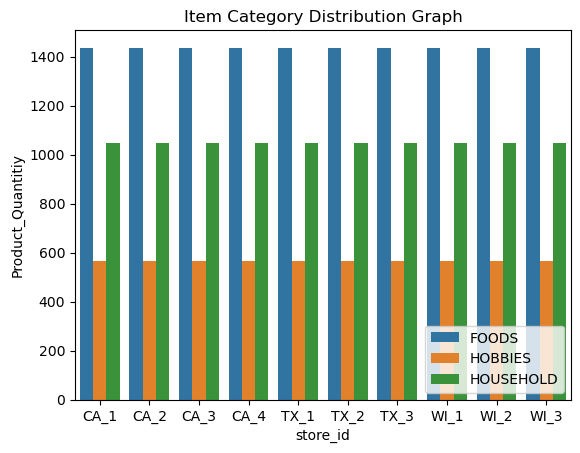

In [12]:
import seaborn as sns
sns.barplot(table_prod_cat_eva_reset_index, x = "store_id", y = 'Product_Quantitiy', hue = 'cat_id')
plt.title("Item Category Distribution Graph")
plt.legend(loc = 'lower right')
plt.show()

In [13]:
if df_eva_product.shape == df_evaluation.shape:
    print("There is no duplicate product in the table")

There is no duplicate product in the table


Lets see how many zeros are in this table

### sell_prices.csv evaluation

In [73]:
df_sell_price_original.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


We can see tha the week id has been linked to this table for the date. However, evaluation table was linked with date id.

In [74]:
df_sell_price_original.isnull().any().sum()

0

We can see that there is no null value in this table.

In [16]:
df_evaluation['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [75]:
df_sell_price =df_sell_price_original.copy()
df_sell_price['category'] = df_sell_price['item_id'].str.split("_")
df_sell_price['category_ID'] =  df_sell_price['item_id'].str.split("_").str[0] + "_" + \
df_sell_price['item_id'].str.split("_").str[1]
df_sell_price['item_number'] =  df_sell_price['item_id'].str.split("_").str[2]
df_sell_price['store_item_id'] =  df_sell_price['store_id'] + "_" + df_sell_price['item_id']
df_sell_price['store_location'] = df_sell_price['store_id'].str.split("_").str[0]
df_sell_price['store_number'] = df_sell_price['store_id'].str.split("_").str[1]
df_sell_price['id'] = df_sell_price['item_id'] + '_' + df_sell_price['store_id'] + '_evaluation'

In [18]:
df_product = df_sell_price.drop_duplicates(['store_id','item_id'])
table_prod_sell = df_product.groupby('store_id')['item_id'].count().to_frame('Product_number')
table_prod_sell

,Product_number
store_id,
CA_1,3049
CA_2,3049
CA_3,3049
CA_4,3049
TX_1,3049
TX_2,3049
TX_3,3049
WI_1,3049
WI_2,3049


In [19]:
if table_prod_sell.compare(table_prod_eva).empty:
    print("same store id and products are in the data for table for evaluation and ")

same store id and products are in the data for table for evaluation and 


In [20]:
if df_eva_product.shape[0] == df_product.shape[0]:
    print("There is no duplicate product in the table between evaluation table and sells price table")

There is no duplicate product in the table between evaluation table and sells price table


### calendar.csv evaluation

In [21]:
df_calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [22]:
df_calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [23]:
df_calender.shape

(1969, 14)

In [24]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [25]:
df_calender.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [26]:
df_calender['event_name_1'] = df_calender['event_name_1'].fillna("No_Event")
df_calender['event_type_1'] = df_calender['event_type_1'].fillna("No_Event")
df_calender['event_name_2'] = df_calender['event_name_2'].fillna("No_Event")
df_calender['event_type_2'] = df_calender['event_type_2'].fillna("No_Event")

In [27]:
df_calender.loc[(df_calender['d'] == 'd_1941')]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1940,2016-05-22,11617,Sunday,2,5,2016,d_1941,No_Event,No_Event,No_Event,No_Event,0,0,0


We would need to create a calender finish with 2016-05-22 to create same table date value as evaluation table

In [28]:
##### import seaborn as sns
from matplotlib import pyplot as plt
df_calender['date'] = pd.to_datetime(df_calender['date'], format = '%Y-%m-%d')

df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  1969 non-null   object        
 8   event_type_1  1969 non-null   object        
 9   event_name_2  1969 non-null   object        
 10  event_type_2  1969 non-null   object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [29]:
N_day_in_wm_yr_wk = df_calender.groupby('wm_yr_wk')['date'].count().to_frame('Number of days in wm_yr_wk').reset_index()
N_day_in_wm_yr_wk.loc[N_day_in_wm_yr_wk['Number of days in wm_yr_wk'] != 7]

,wm_yr_wk,Number of days in wm_yr_wk
281,11621,2


we can see here that all the week id contain 7 days except last id

In [30]:
df_calender.loc[(df_calender['date'] >= '2011-12-31') & (df_calender['date'] <= '2012-01-30')]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
336,2011-12-31,11149,Saturday,1,12,2011,d_337,No_Event,No_Event,No_Event,No_Event,0,0,0
337,2012-01-01,11149,Sunday,2,1,2012,d_338,NewYear,National,No_Event,No_Event,1,1,0
338,2012-01-02,11149,Monday,3,1,2012,d_339,No_Event,No_Event,No_Event,No_Event,1,0,1
339,2012-01-03,11149,Tuesday,4,1,2012,d_340,No_Event,No_Event,No_Event,No_Event,1,1,1
340,2012-01-04,11149,Wednesday,5,1,2012,d_341,No_Event,No_Event,No_Event,No_Event,1,0,0
341,2012-01-05,11149,Thursday,6,1,2012,d_342,No_Event,No_Event,No_Event,No_Event,1,1,1
342,2012-01-06,11149,Friday,7,1,2012,d_343,No_Event,No_Event,No_Event,No_Event,1,1,1
343,2012-01-07,11150,Saturday,1,1,2012,d_344,OrthodoxChristmas,Religious,No_Event,No_Event,1,1,0
344,2012-01-08,11150,Sunday,2,1,2012,d_345,No_Event,No_Event,No_Event,No_Event,1,0,1
345,2012-01-09,11150,Monday,3,1,2012,d_346,No_Event,No_Event,No_Event,No_Event,1,1,1


We can see that the 'wm_yr_wk' does not increment by 1 every time. 11201 which explains the trend of . <br>
It seems to be the combination of '1' and last 2 digits of year and week number

In [31]:
import datetime

df_calender['wm_yr_wk_shift'] = df_calender['wm_yr_wk'].shift(1)
df_calender.loc[(df_calender['wm_yr_wk'] - df_calender['wm_yr_wk_shift'] > 1) | (df_calender['wm_yr_wk'] - df_calender['wm_yr_wk_shift'] < 0)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift
364,2012-01-28,11201,Saturday,1,1,2012,d_365,No_Event,No_Event,No_Event,No_Event,0,0,0,11152.0
728,2013-01-26,11301,Saturday,1,1,2013,d_729,No_Event,No_Event,No_Event,No_Event,0,0,0,11252.0
1099,2014-02-01,11401,Saturday,1,2,2014,d_1100,No_Event,No_Event,No_Event,No_Event,1,1,0,11353.0
1463,2015-01-31,11501,Saturday,1,1,2015,d_1464,No_Event,No_Event,No_Event,No_Event,0,0,0,11452.0
1827,2016-01-30,11601,Saturday,1,1,2016,d_1828,No_Event,No_Event,No_Event,No_Event,0,0,0,11552.0


This shows that every beginning week of Febuary 'wr_yr_wk' reset the week count and change the year

In [32]:
import datetime
weekday = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
actual_time = pd.DataFrame()
actual_time['date'] = pd.date_range(start = '2011-01-29', end = '2016-06-19', freq = '1D')
actual_time['weekday'] = actual_time['date'].map(lambda x: weekday[x.weekday()])
actual_time.loc[actual_time['weekday'] != df_calender['weekday']]

,date,weekday


This shows weekday data is correct

In [80]:
actual_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1969 non-null   datetime64[ns]
 1   weekday  1969 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 30.9+ KB


In [ ]:

df_calender['d_num'] = df_calender['d'].str.split("_").str[1]
df_calender['d_shift'] = df_calender['d_num'].shift(1)
df_calender.head()

In [ ]:
df_calender.loc[((df_calender['d_num']).astype(float) - df_calender['d_shift'].astype(float) > 1) | (df_calender['d_num'].astype(float) - df_calender['d_shift'].astype(float) < 0)]

In [82]:
df_calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


This shows d information is correctly incremented.

In [83]:
df_calender.drop(labels=['d_shift','wm_yr_wk_shift'], axis=1)

KeyError: "['d_shift', 'wm_yr_wk_shift'] not found in axis"

In [36]:
df_week_check_CA = df_calender.groupby(['weekday','snap_CA'])['weekday'].count().to_frame('Count_of_Date').reset_index()
df_week_check_WI = df_calender.groupby(['weekday','snap_WI'])['weekday'].count().to_frame('Count_of_Date').reset_index()
df_week_check_TX = df_calender.groupby(['weekday','snap_TX'])['weekday'].count().to_frame('Count_of_Date').reset_index()
df_week_check_All = df_calender.groupby(['weekday'])['weekday'].count().to_frame('Count_of_Date').reset_index()

In [37]:
df_week_check_All['CA_SNAP_YES'] =  df_week_check_CA['Count_of_Date'].loc[df_week_check_CA['snap_CA'] == 1].reset_index().drop('index', axis = 1)
df_week_check_All['CA_SNAP_NO'] =  df_week_check_CA['Count_of_Date'].loc[df_week_check_CA['snap_CA'] == 0].reset_index().drop('index', axis = 1)
df_week_check_All['WI_SNAP_YES'] =  df_week_check_WI['Count_of_Date'].loc[df_week_check_WI['snap_WI'] == 1].reset_index().drop('index', axis = 1)
df_week_check_All['WI_SNAP_NO'] =  df_week_check_WI['Count_of_Date'].loc[df_week_check_WI['snap_WI'] == 0].reset_index().drop('index', axis = 1)
df_week_check_All['TX_SNAP_YES'] =  df_week_check_TX['Count_of_Date'].loc[df_week_check_TX['snap_TX'] == 1].reset_index().drop('index', axis = 1)
df_week_check_All['TX_SNAP_NO'] =  df_week_check_TX['Count_of_Date'].loc[df_week_check_TX['snap_TX'] == 0].reset_index().drop('index', axis = 1)
df_week_check_All = df_week_check_All.drop('Count_of_Date', axis = 1)

In [38]:
df_week_check_All_test = pd.melt(df_week_check_All, id_vars= 'weekday', var_name="State and SNAP")

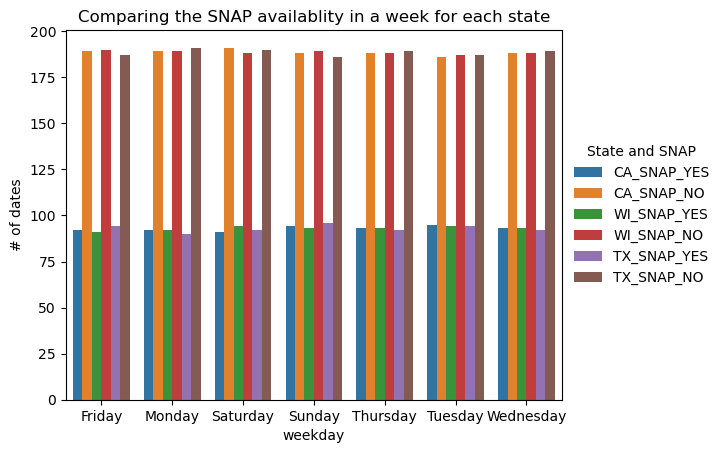

In [39]:
from matplotlib import pyplot as plt
ax = sns.barplot(data = df_week_check_All_test, x ='weekday', y = 'value', hue ="State and SNAP" )
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.title("Comparing the SNAP availablity in a week for each state")
plt.ylabel("# of dates")
plt.show()

In [40]:
df_calender['event_type_1'].value_counts()

df_calender_event1_type_count = df_calender.groupby('event_type_1')['date'].count().to_frame('Number of Event')
df_calender_event1_type_count

,Number of Event
event_type_1,
Cultural,37
National,52
No_Event,1807
Religious,55
Sporting,18


In [41]:
df_calender_event2_type_count = df_calender.groupby('event_type_2')['date'].count().to_frame('Number of Event')
df_calender_event2_type_count

,Number of Event
event_type_2,
Cultural,4
No_Event,1964
Religious,1


In [42]:
df_calender_event1_name_count = df_calender.groupby('event_name_1')['date'].count().to_frame('Number of Event Occured').sort_values('Number of Event Occured')
df_calender_event1_name_count

,Number of Event Occured
event_name_1,
Father's day,4
Chanukah End,5
Thanksgiving,5
OrthodoxEaster,5
OrthodoxChristmas,5
NewYear,5
MartinLutherKingDay,5
LaborDay,5
IndependenceDay,5


In [43]:
df_calender_event2_name_count = df_calender.groupby('event_name_2')['date'].count().to_frame('Number of Event Occured').sort_values('Number of Event Occured')
df_calender_event2_name_count

,Number of Event Occured
event_name_2,
Cinco De Mayo,1
Easter,1
OrthodoxEaster,1
Father's day,2
No_Event,1964


### Modify the table

In [44]:
df_evaluation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [45]:
df_sell_price

,store_id,item_id,wm_yr_wk,sell_price,category,category_ID,item_number,store_item_id,store_location,store_number,id
0,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation
1,CA_1,HOBBIES_1_001,11326,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation
2,CA_1,HOBBIES_1_001,11327,8.26,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation
3,CA_1,HOBBIES_1_001,11328,8.26,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation
4,CA_1,HOBBIES_1_001,11329,8.26,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation
...,...,...,...,...,...,...,...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841117,WI_3,FOODS_3_827,11618,1.00,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841118,WI_3,FOODS_3_827,11619,1.00,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841119,WI_3,FOODS_3_827,11620,1.00,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation


In [46]:
data_melt = df_evaluation.drop(['item_id','dept_id','cat_id','store_id','state_id'], axis = 1).melt(id_vars='id', var_name='d', value_name='Daily_total_number_sales')

In [47]:
data_melt = data_melt.merge(df_calender, on = 'd',how = 'left')
data_melt['date'] = pd.to_datetime(data_melt['date'])

In [48]:
data_melt = data_melt.merge(df_evaluation[['id','item_id','dept_id','cat_id','store_id','state_id']], on = 'id')
                            

In [49]:
data_melt.head()


,id,Daily_total_number_sales,date,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_evaluation,0,2011-01-29,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_001_CA_1_evaluation,0,2011-01-30,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_001_CA_1_evaluation,0,2011-01-31,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_001_CA_1_evaluation,0,2011-02-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_001_CA_1_evaluation,0,2011-02-02,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA


In [77]:
ma_df=pd.melt(df_evaluation,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='demand')
ma_df=pd.merge(ma_df,df_calender,on='d',how='left')
ma_df=pd.merge(ma_df,df_sell_price_original,on=['item_id','store_id','wm_yr_wk'],how='left')

In [79]:
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   demand        int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 9.7+ GB


In [69]:
ma_df2=pd.melt(df_evaluation,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],var_name='d',value_name='demand')
ma_df2=pd.merge(ma_df2,df_calender,on='d',how='left')

In [70]:
ma_df2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,...,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,d_num,d_shift
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None


In [51]:
data_Overall_State = data_melt.groupby(['date','state_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_State = data_Overall_State.reset_index()
data_Overall_Store = data_melt.groupby(['date','store_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_Store = data_Overall_Store.reset_index()
total_sales_by_store_category = data_melt.groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_category = total_sales_by_store_category.reset_index()

In [52]:
N_day_in_wm_yr_wk = df_calender.groupby('wm_yr_wk')['date'].count().to_frame('Number of days in wm_yr_wk').reset_index()
N_day_in_wm_yr_wk.loc[N_day_in_wm_yr_wk['Number of days in wm_yr_wk'] != 7]

,wm_yr_wk,Number of days in wm_yr_wk
281,11621,2


we can see here that all the week id contain 7 days except last id

In [53]:
data_melt_weekday_date = data_melt.groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_weekday_date = data_melt_weekday_date.merge(df_calender[['date', 'weekday']], on = 'date')

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


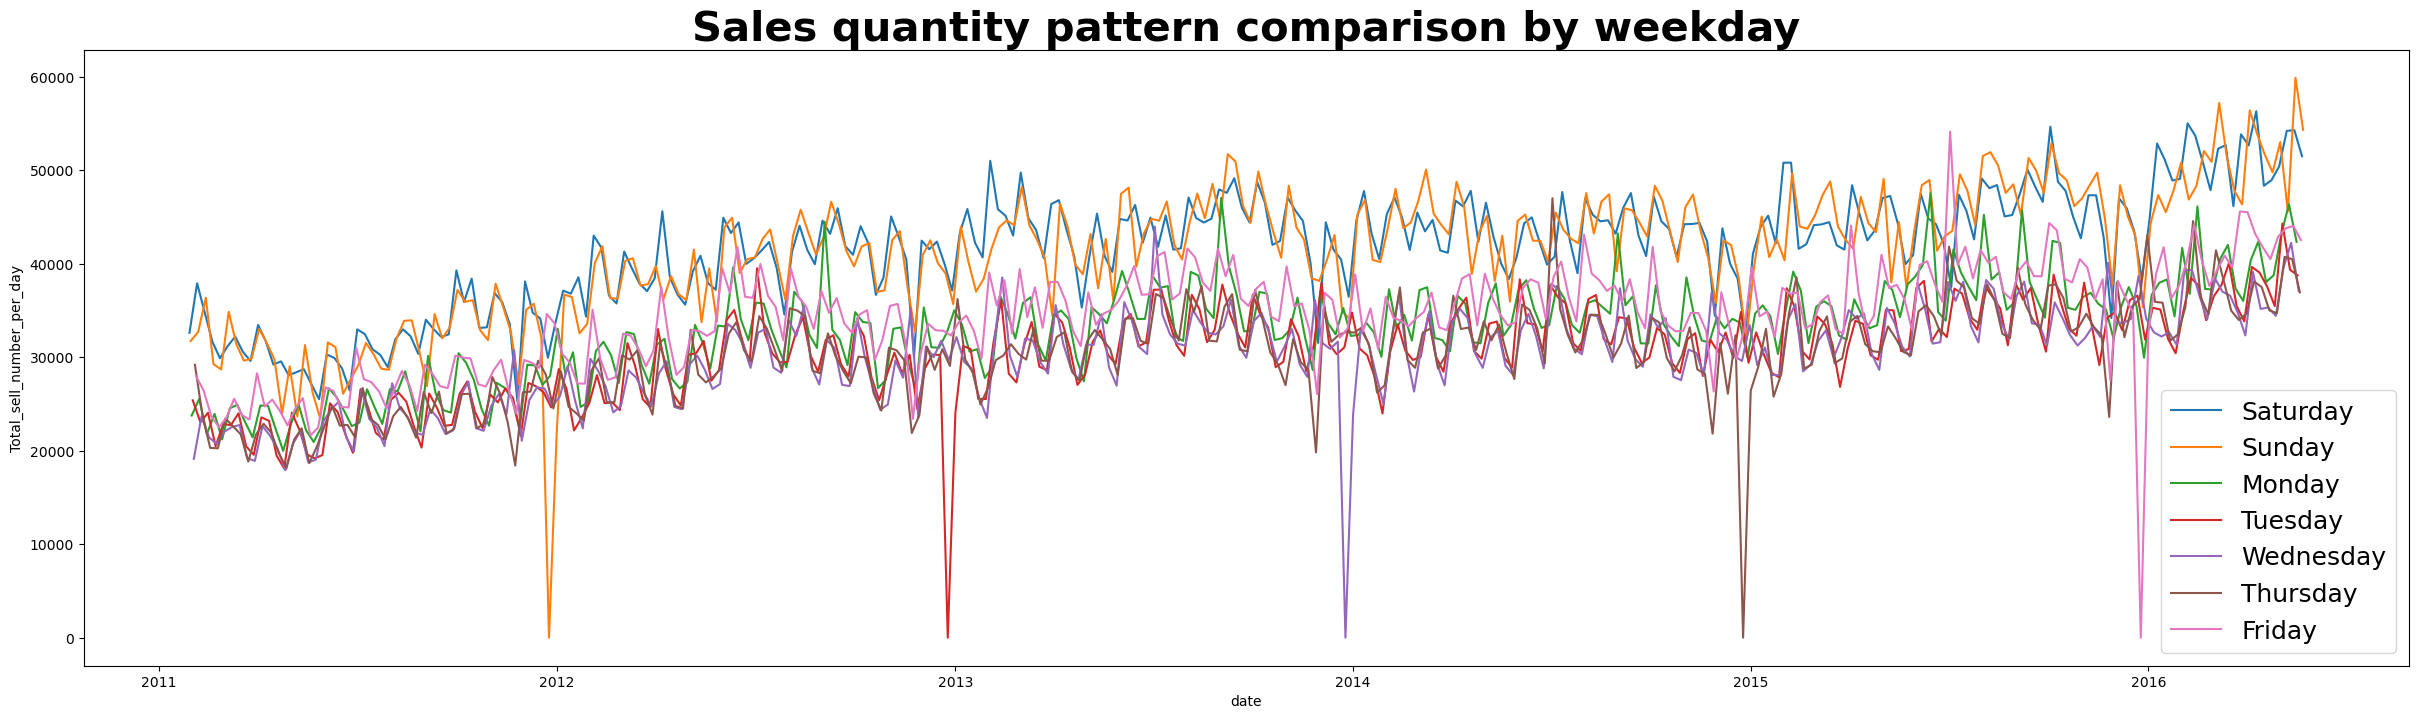

In [54]:
weekday = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_sell_number_per_day",
             hue="weekday",
             data=data_melt_weekday_date)
plt.legend(prop ={'size':18})
plt.title("Sales quantity pattern comparison by weekday", fontsize = 30, weight = 'bold')
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


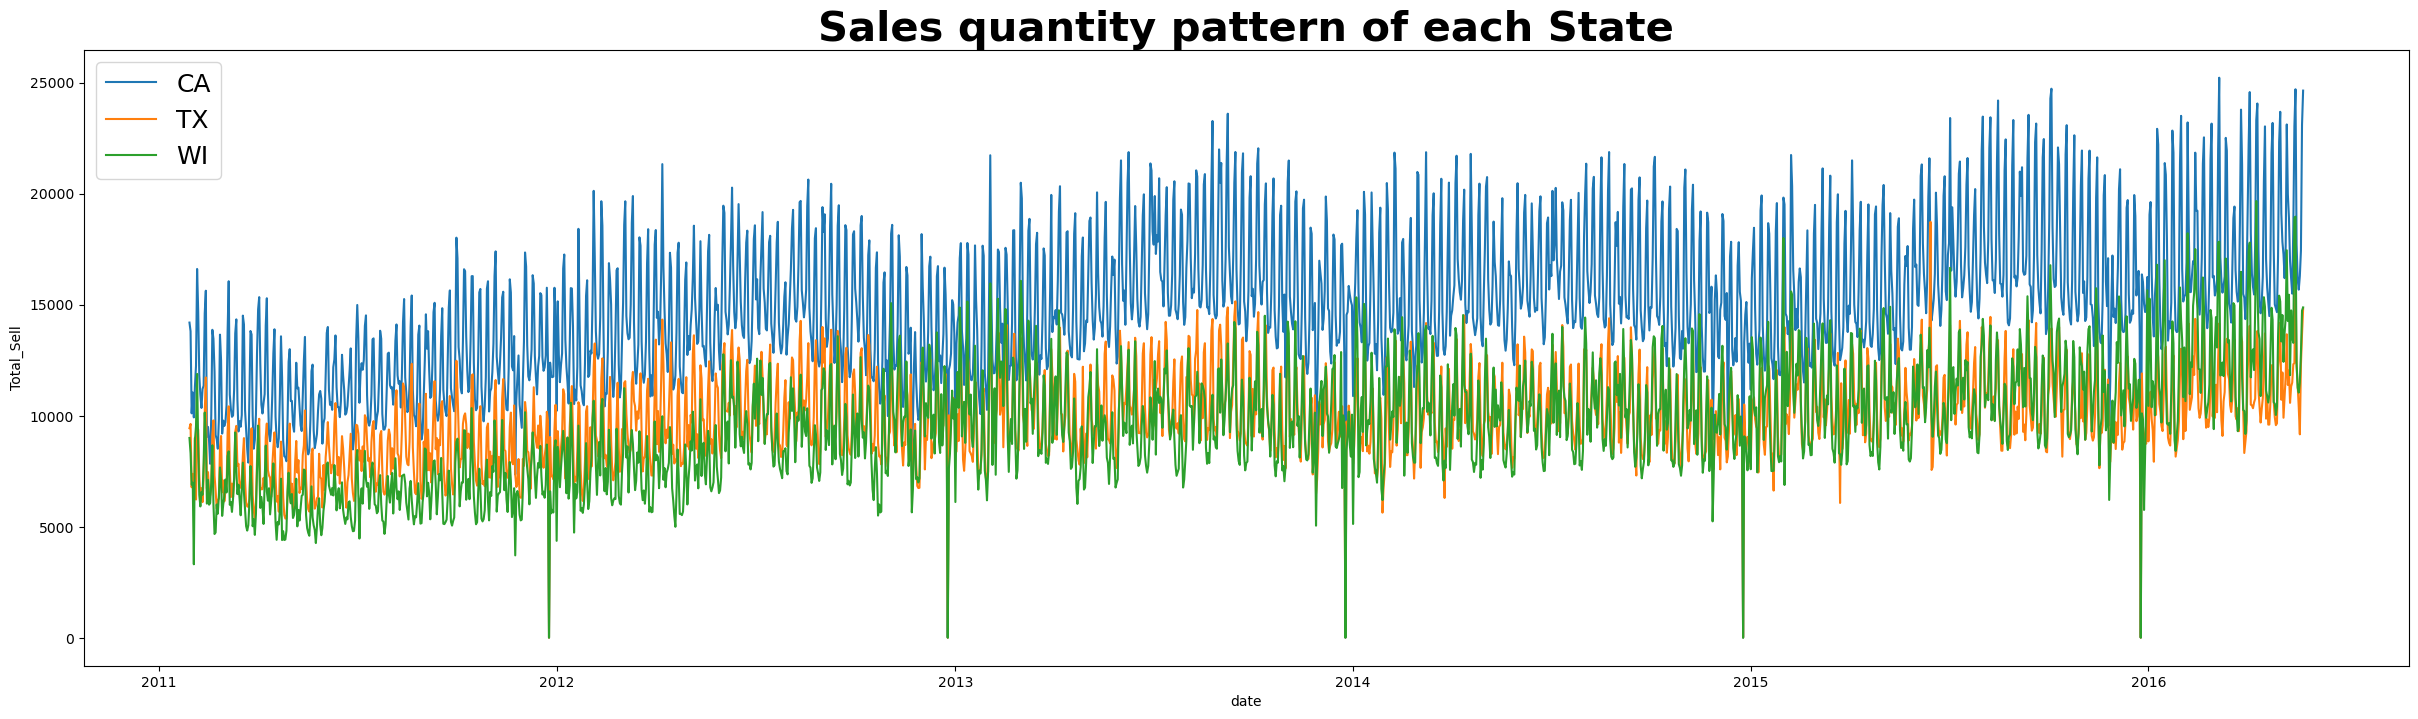

In [55]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="state_id",
             data=data_Overall_State)
plt.legend( prop ={'size':18})
plt.title("Sales quantity pattern of each State", fontsize = 30, weight = 'bold')
plt.show()

In [62]:
data_Overall_State_year = data_melt.groupby(['year','state_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_State_year = data_Overall_State.reset_index()
data_Overall_State_year_merge = data_Overall_State_year.merge(df_calender[['date', 'year']].loc[df_calender['date'].day == 1], on = 'year')
# data_Overall_State_year = data_Overall_State_year.merge(df_calender.loc[[['id','item_id','dept_id','cat_id','store_id','state_id']], on = 'id')
# data_Overall_Store_year = data_melt.groupby(['year','store_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
# data_Overall_Store_year = data_Overall_Store.reset_index()
# total_sales_by_store_category_year = data_melt.groupby(['year','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
# total_sales_by_store_category_year = total_sales_by_store_category.reset_index()

KeyError: 'year'

In [60]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1969 non-null   datetime64[ns]
 1   wm_yr_wk        1969 non-null   int64         
 2   weekday         1969 non-null   object        
 3   wday            1969 non-null   int64         
 4   month           1969 non-null   int64         
 5   year            1969 non-null   int64         
 6   d               1969 non-null   object        
 7   event_name_1    1969 non-null   object        
 8   event_type_1    1969 non-null   object        
 9   event_name_2    1969 non-null   object        
 10  event_type_2    1969 non-null   object        
 11  snap_CA         1969 non-null   int64         
 12  snap_TX         1969 non-null   int64         
 13  snap_WI         1969 non-null   int64         
 14  wm_yr_wk_shift  1968 non-null   float64       
 15  d_nu

In [ ]:
data_Overall_State_year = data_melt.groupby(['year','state_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_State_year = data_Overall_State.reset_index()
data_Overall_Store_year = data_melt.groupby(['year','store_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
data_Overall_Store_year = data_Overall_Store.reset_index()
total_sales_by_store_category_year = data_melt.groupby(['year','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_Sell')
total_sales_by_store_category_year = total_sales_by_store_category.reset_index()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="state_id",
             data=data_Overall_State_year)
plt.legend( prop ={'size':18})
plt.title("Sales quantity pattern of each State", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=data_Overall_Store)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each store", fontsize = 30, weight = 'bold')
plt.show()

In [ ]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="cat_id",
             data=total_sales_by_store_category)
plt.legend( prop ={'size':18})
plt.title("Category Sales Overall", fontsize = 30, weight = 'bold')
plt.show()

In [174]:
data_melt_CA = data_melt.loc[data_melt['state_id'] == 'CA'].groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_CA = data_melt_CA.merge(df_calender[['date', 'snap_CA']], on = 'date')
data_melt_CA['snap_CA'] = data_melt_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_WI = data_melt.loc[data_melt['state_id'] == 'WI'].groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_WI = data_melt_WI.merge(df_calender[['date', 'snap_WI']], on = 'date')
data_melt_WI['snap_WI'] = data_melt_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_TX = data_melt.loc[data_melt['state_id'] == 'TX'].groupby('date')['Daily_total_number_sales'].sum().to_frame('Total_sell_number_per_day')
data_melt_TX = data_melt_TX.merge(df_calender[['date', 'snap_TX']], on = 'date')
data_melt_TX['snap_TX'] = data_melt_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Texas')

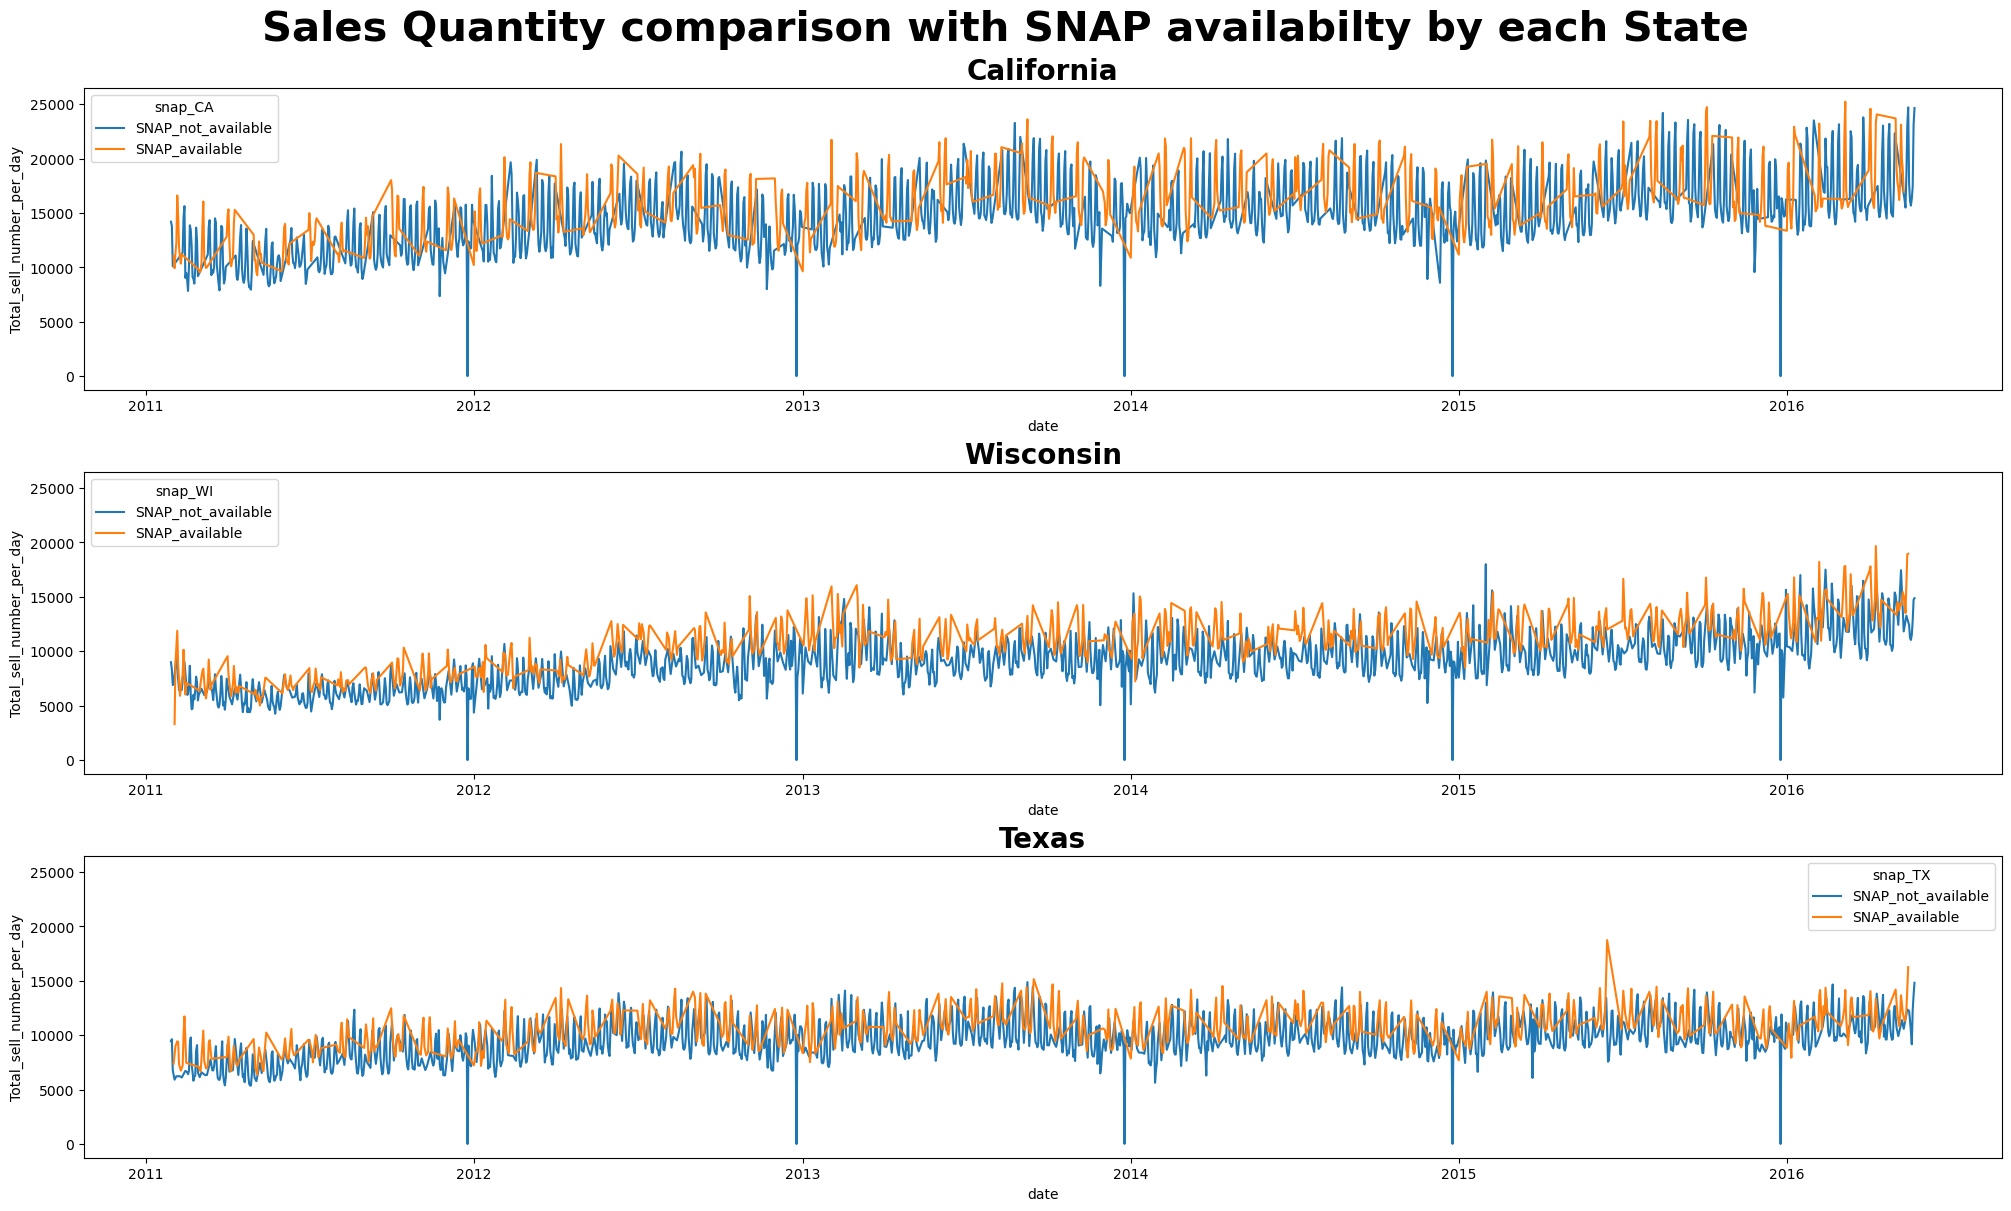

In [176]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales Quantity comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_sell_number_per_day", hue="snap_CA", data = data_melt_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
snap_graph_WI =sns.lineplot(x = "date", y = "Total_sell_number_per_day", hue="snap_WI",  data = data_melt_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
snap_graph_TX =sns.lineplot(x = "date", y = "Total_sell_number_per_day", hue="snap_TX", data = data_melt_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

In [178]:
data_melt_cat_CA = data_melt.loc[data_melt['state_id'] == 'CA'].groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_day').reset_index()
data_melt_cat_CA = data_melt_cat_CA.merge(df_calender[['date', 'snap_CA']], on = 'date')
data_melt_cat_CA['snap_CA'] = data_melt_cat_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melte_cat_WI = data_melt.loc[data_melt['state_id'] == 'WI'].groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_day').reset_index()
data_melte_cat_WI = data_melte_cat_WI.merge(df_calender[['date', 'snap_WI']], on = 'date')
data_melte_cat_WI['snap_WI'] = data_melte_cat_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

data_melt_cat_TX = data_melt.loc[data_melt['state_id'] == 'TX'].groupby(['date','cat_id'])['Daily_total_number_sales'].sum().to_frame('Total_number_sell_per_day').reset_index()
data_melt_cat_TX = data_melt_cat_TX.merge(df_calender[['date', 'snap_TX']], on = 'date')
data_melt_cat_TX['snap_TX'] = data_melt_cat_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

In [179]:
data_melt_cat_CA['cat_id_SNAP'] = data_melt_cat_CA['cat_id'] +'_'+data_melt_cat_CA['snap_CA']
data_melte_cat_WI['cat_id_SNAP'] = data_melte_cat_WI['cat_id'] +'_'+data_melte_cat_WI['snap_WI']
data_melt_cat_TX['cat_id_SNAP'] = data_melt_cat_TX['cat_id'] +'_'+data_melt_cat_TX['snap_TX']

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Texas')

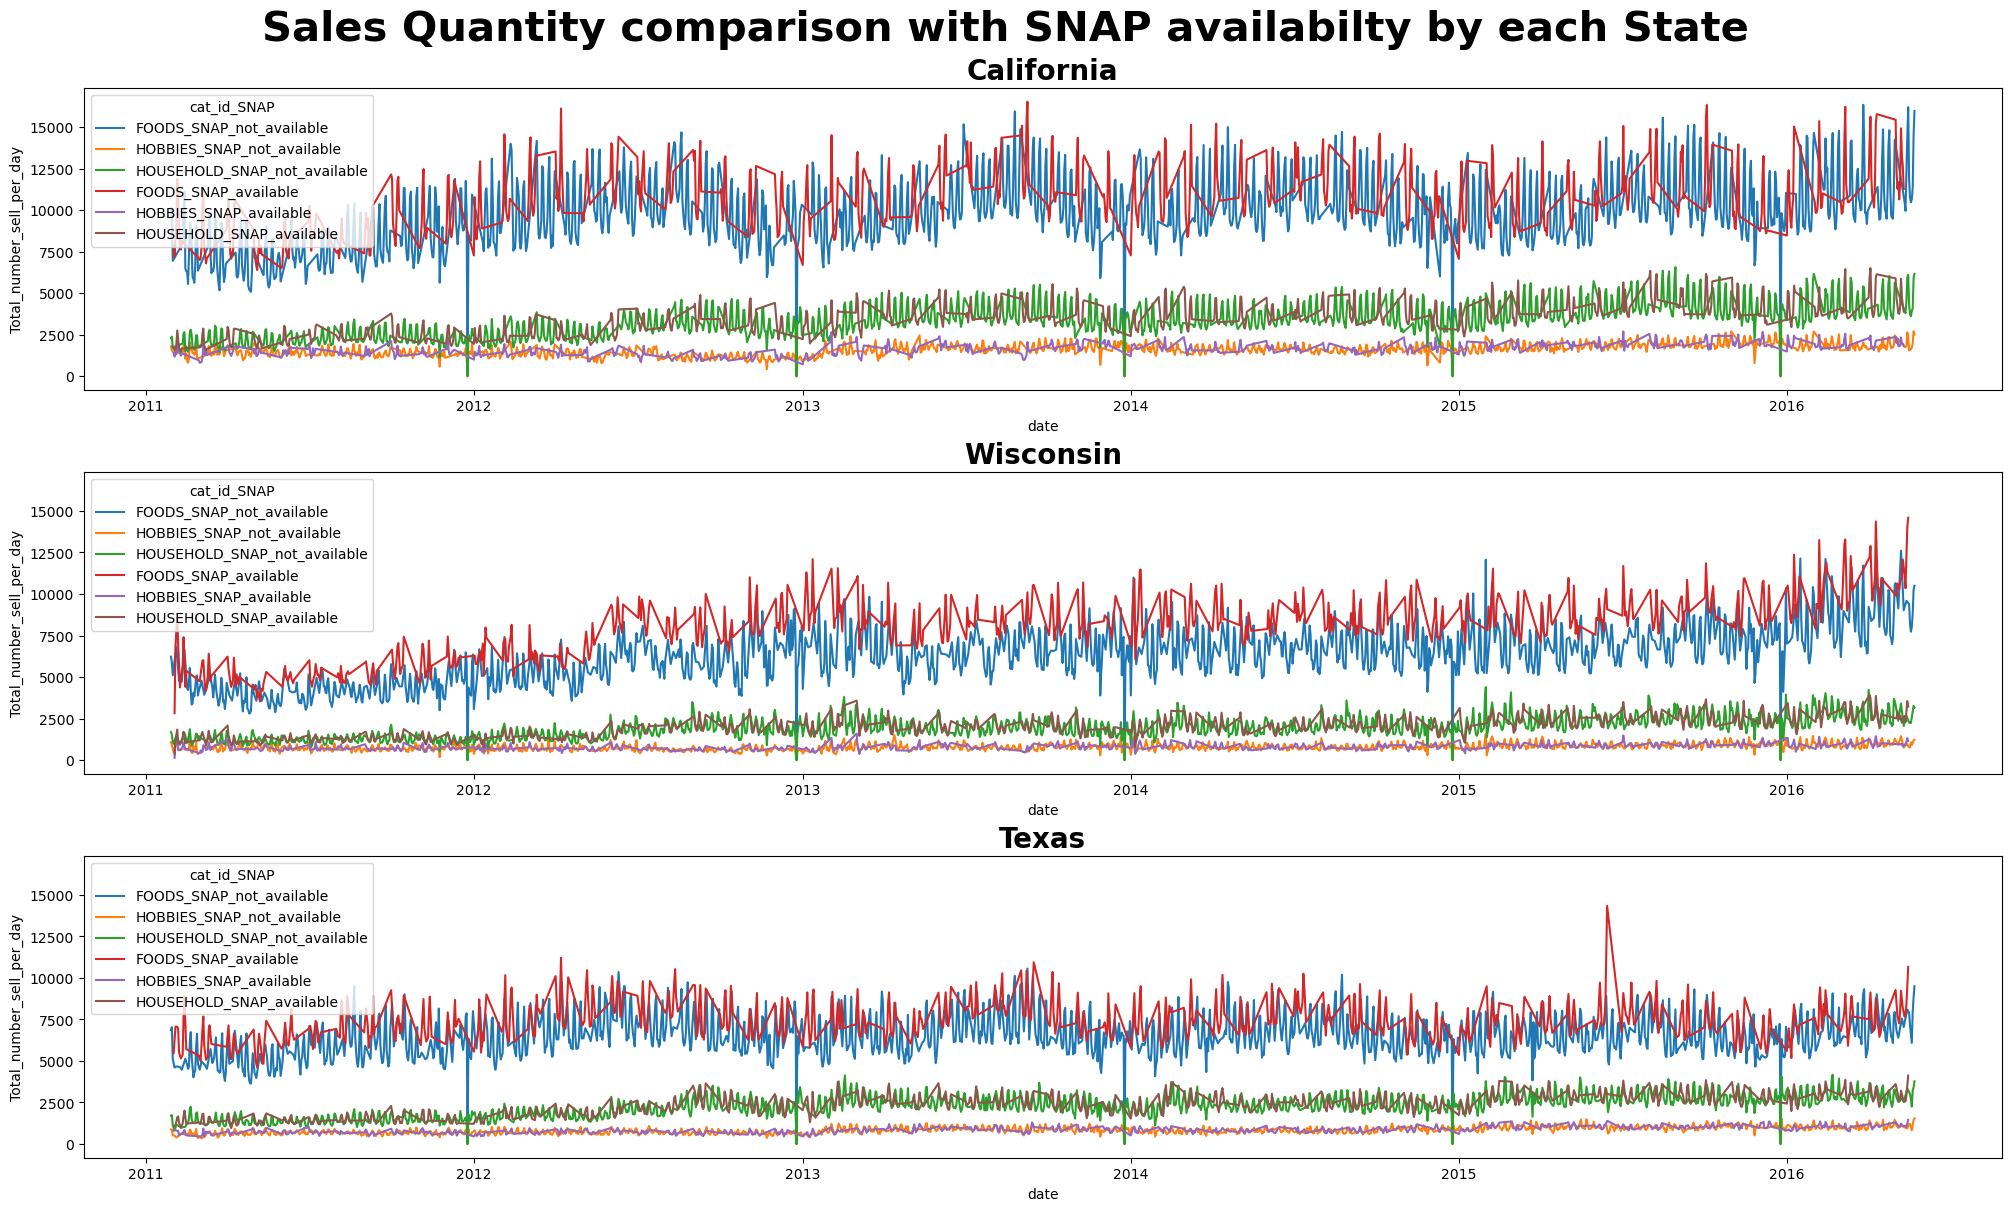

In [181]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales Quantity comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_number_sell_per_day", hue="cat_id_SNAP", data = data_melt_cat_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')

snap_graph_WI =sns.lineplot(x = "date", y = "Total_number_sell_per_day", hue="cat_id_SNAP",  data = data_melte_cat_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')

snap_graph_TX =sns.lineplot(x = "date", y = "Total_number_sell_per_day", hue="cat_id_SNAP", data = data_melt_cat_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

In [143]:
total_salesQ_by_store_category.melt(id_vars='id', var_name='d', value_name='Daily_total_number_sales')

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729
...,...,...,...
2016-05-18,24790,3740,8566
2016-05-19,24737,3475,8751
2016-05-20,28136,4143,10273


In [55]:
df_sell_test = df_sell_price.merge(df_calender[['date', 'wm_yr_wk','d']], on = 'wm_yr_wk')
df_sell_test.shape

(47735397, 13)

In [56]:
df_sell_test.tail()

,store_id,item_id,wm_yr_wk,sell_price,category,category_ID,item_number,store_item_id,store_location,store_number,id,date,d
47735392,WI_3,FOODS_3_825,11105,4.0,"[FOODS, 3, 825]",FOODS_3,825,WI_3_FOODS_3_825,WI,3,FOODS_3_825_WI_3_evaluation,2011-02-28,d_31
47735393,WI_3,FOODS_3_825,11105,4.0,"[FOODS, 3, 825]",FOODS_3,825,WI_3_FOODS_3_825,WI,3,FOODS_3_825_WI_3_evaluation,2011-03-01,d_32
47735394,WI_3,FOODS_3_825,11105,4.0,"[FOODS, 3, 825]",FOODS_3,825,WI_3_FOODS_3_825,WI,3,FOODS_3_825_WI_3_evaluation,2011-03-02,d_33
47735395,WI_3,FOODS_3_825,11105,4.0,"[FOODS, 3, 825]",FOODS_3,825,WI_3_FOODS_3_825,WI,3,FOODS_3_825_WI_3_evaluation,2011-03-03,d_34
47735396,WI_3,FOODS_3_825,11105,4.0,"[FOODS, 3, 825]",FOODS_3,825,WI_3_FOODS_3_825,WI,3,FOODS_3_825_WI_3_evaluation,2011-03-04,d_35


In [57]:
df_sell_price.loc[df_sell_price['wm_yr_wk'] == 11621].shape


(30490, 11)

There were only 2 day in 11621 and there is 30490 of them

In [58]:
6841121 * 7 - (30490 *5)


47735397

The d has been input correctly

In [59]:
df_evaluation_test = df_evaluation.copy()

In [60]:
# d_value = df_calender['d'].values
# all_items = df_evaluation_test['id'].values
# for item in all_items:
#     for date in d_value:
#         df_evaluation_test.loc[df_evaluation_test['id'] == item, date] = df_evaluation_test.loc[df_evaluation_test['id'] == item, date] * \
#                                                                             df_sell_test.loc[(df_sell_test['id'] == item) & \
#                                                                                              (df_sell_test['d'] == date), 'sell_price']

In [61]:
df_evaluation_test.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [62]:
df_evaluation_test.loc[df_evaluation_test['id'] == 'FOODS_3_825_WI_3_evaluation', 'd_1']

30487    0
Name: d_1, dtype: int64

In [63]:
df_sell_test.loc[(df_sell_test['id'] == 'FOODS_3_825_WI_3_evaluation') & (df_sell_test['d'] == 'd_1')]

,store_id,item_id,wm_yr_wk,sell_price,category,category_ID,item_number,store_item_id,store_location,store_number,id,date,d
47383108,WI_3,FOODS_3_825,11101,4.0,"[FOODS, 3, 825]",FOODS_3,825,WI_3_FOODS_3_825,WI,3,FOODS_3_825_WI_3_evaluation,2011-01-29,d_1


In [64]:
df = df_evaluation.drop(columns = ['item_id', 'dept_id', 'cat_id', 'store_id','state_id'])


In [65]:
df = df.set_index('id')

In [66]:
# df_t2 = df.pivot(columns = 'id')
df_t = df.transpose().reset_index()
df_t = df_t.rename(columns = {'index':'d'})
df_t

id,d,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
0,d_1,0,0,0,0,0,0,0,12,2,...,0,14,1,0,4,0,0,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,0,11,1,0,4,0,0,6,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,0,5,1,0,2,2,0,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,0,6,1,0,5,2,0,2,0,0
4,d_5,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,d_1937,0,0,0,1,0,0,1,5,0,...,3,6,3,0,0,1,0,1,0,0
1937,d_1938,3,0,2,3,0,0,0,4,0,...,1,4,3,1,2,0,1,0,1,2
1938,d_1939,3,0,3,0,2,5,1,1,0,...,3,4,3,1,1,0,0,1,1,2
1939,d_1940,0,0,0,2,1,2,1,40,1,...,0,1,0,0,3,1,1,0,1,5


In [67]:
df_calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,d_num,d_shift
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,2,1
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,3,2
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0,11101.0,4,3
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1,11101.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,No_Event,No_Event,No_Event,0,1,1,11620.0,1965,1964
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,No_Event,No_Event,No_Event,0,0,0,11620.0,1966,1965
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,No_Event,No_Event,No_Event,0,0,0,11620.0,1967,1966
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,No_Event,No_Event,No_Event,0,0,0,11620.0,1968,1967


In [68]:
single_df_linear = df.reset_index()
single_df_linear

single_df_linear = df_calender.groupby(['event_name_1'])['d'].count().to_frame('Count_of_Event')
event_name_list = pd.DataFrame()
event_name_list['event'] = single_df_linear.index

In [69]:
single_df_linear

,Count_of_Event
event_name_1,
Chanukah End,5
Christmas,5
Cinco De Mayo,5
ColumbusDay,5
Easter,5
Eid al-Fitr,5
EidAlAdha,5
Father's day,4
Halloween,5


In [70]:
# df_data = df_t.merge(df_calender.drop(columns = ['wm_yr_wk_shift', 'd_num', 'd_shift']), on = 'd').reset_index()[['date', 'id']]
# df_data
# df_data.set_index('date')
# df_data.head()
# df_data.columns

In [71]:
df_data = df_t.merge(df_calender.drop(columns = ['wm_yr_wk_shift', 'd_num', 'd_shift']), on = 'd')

In [72]:
df_data

,d,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,0,0,0,0,0,0,0,12,2,...,1,1,2011,No_Event,No_Event,No_Event,No_Event,0,0,0
1,d_2,0,0,0,0,0,0,0,15,0,...,2,1,2011,No_Event,No_Event,No_Event,No_Event,0,0,0
2,d_3,0,0,0,0,0,0,0,0,7,...,3,1,2011,No_Event,No_Event,No_Event,No_Event,0,0,0
3,d_4,0,0,0,0,0,0,0,0,3,...,4,2,2011,No_Event,No_Event,No_Event,No_Event,1,1,0
4,d_5,0,0,0,0,0,0,0,0,0,...,5,2,2011,No_Event,No_Event,No_Event,No_Event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,d_1937,0,0,0,1,0,0,1,5,0,...,5,5,2016,No_Event,No_Event,No_Event,No_Event,0,0,0
1937,d_1938,3,0,2,3,0,0,0,4,0,...,6,5,2016,No_Event,No_Event,No_Event,No_Event,0,0,0
1938,d_1939,3,0,3,0,2,5,1,1,0,...,7,5,2016,No_Event,No_Event,No_Event,No_Event,0,0,0
1939,d_1940,0,0,0,2,1,2,1,40,1,...,1,5,2016,No_Event,No_Event,No_Event,No_Event,0,0,0


In [73]:
df_data = df_data.set_index('date')

In [74]:
df_sell_price.tail()

,store_id,item_id,wm_yr_wk,sell_price,category,category_ID,item_number,store_item_id,store_location,store_number,id
6841116,WI_3,FOODS_3_827,11617,1.0,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841117,WI_3,FOODS_3_827,11618,1.0,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841118,WI_3,FOODS_3_827,11619,1.0,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841119,WI_3,FOODS_3_827,11620,1.0,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation
6841120,WI_3,FOODS_3_827,11621,1.0,"[FOODS, 3, 827]",FOODS_3,827,WI_3_FOODS_3_827,WI,3,FOODS_3_827_WI_3_evaluation


In [75]:
df_sell = df_sell_price.merge(df_calender[['date', 'wm_yr_wk']], on = 'wm_yr_wk')

In [76]:
df_sell.head(10)

,store_id,item_id,wm_yr_wk,sell_price,category,category_ID,item_number,store_item_id,store_location,store_number,id,date
0,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-13
1,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-14
2,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-15
3,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-16
4,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-17
5,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-18
6,CA_1,HOBBIES_1_001,11325,9.58,"[HOBBIES, 1, 001]",HOBBIES_1,001,CA_1_HOBBIES_1_001,CA,1,HOBBIES_1_001_CA_1_evaluation,2013-07-19
7,CA_1,HOBBIES_1_002,11325,3.97,"[HOBBIES, 1, 002]",HOBBIES_1,002,CA_1_HOBBIES_1_002,CA,1,HOBBIES_1_002_CA_1_evaluation,2013-07-13
8,CA_1,HOBBIES_1_002,11325,3.97,"[HOBBIES, 1, 002]",HOBBIES_1,002,CA_1_HOBBIES_1_002,CA,1,HOBBIES_1_002_CA_1_evaluation,2013-07-14
9,CA_1,HOBBIES_1_002,11325,3.97,"[HOBBIES, 1, 002]",HOBBIES_1,002,CA_1_HOBBIES_1_002,CA,1,HOBBIES_1_002_CA_1_evaluation,2013-07-15


In [77]:
lis = df_sell['id'].unique()

In [78]:
df_sell_temp = df_sell.sort_values(['id', 'date']).reset_index()

In [79]:
df_sell_mod = df_sell_temp[['id','sell_price','date']]
df_sell_date = df_sell_mod.pivot_table(index = 'date', columns= 'id', values='sell_price', fill_value = 0)

In [80]:
df_sell_date.columns

Index(['FOODS_1_001_CA_1_evaluation', 'FOODS_1_001_CA_2_evaluation',
       'FOODS_1_001_CA_3_evaluation', 'FOODS_1_001_CA_4_evaluation',
       'FOODS_1_001_TX_1_evaluation', 'FOODS_1_001_TX_2_evaluation',
       'FOODS_1_001_TX_3_evaluation', 'FOODS_1_001_WI_1_evaluation',
       'FOODS_1_001_WI_2_evaluation', 'FOODS_1_001_WI_3_evaluation',
       ...
       'HOUSEHOLD_2_516_CA_1_evaluation', 'HOUSEHOLD_2_516_CA_2_evaluation',
       'HOUSEHOLD_2_516_CA_3_evaluation', 'HOUSEHOLD_2_516_CA_4_evaluation',
       'HOUSEHOLD_2_516_TX_1_evaluation', 'HOUSEHOLD_2_516_TX_2_evaluation',
       'HOUSEHOLD_2_516_TX_3_evaluation', 'HOUSEHOLD_2_516_WI_1_evaluation',
       'HOUSEHOLD_2_516_WI_2_evaluation', 'HOUSEHOLD_2_516_WI_3_evaluation'],
      dtype='object', name='id', length=30490)

In [81]:
# df_data_only = df_t.merge(df_calender[['d', 'date']], on = 'd')
# df_act_sell_date = df_sell_date.mul(df_t.iloc[:,1:], axis = 'index')
# df_act_sell_date = pd.DataFrame(df_sell_date.values * df_t.iloc[:,1:].values, columns = df_sell_date.columns)

In [82]:
pd.set_option('display.max_columns',20)
df_data_only = df_t.merge(df_calender, on = 'd')
df_data_only = df_data_only.iloc[:,1:].set_index('date')

In [83]:
df_data_only

,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,d_num,d_shift
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,2,1
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,3,2
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,No_Event,No_Event,No_Event,No_Event,1,1,0,11101.0,4,3
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,No_Event,No_Event,No_Event,No_Event,1,0,1,11101.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,0,0,0,1,0,0,1,5,0,1,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1937,1936
2016-05-19,3,0,2,3,0,0,0,4,0,1,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1938,1937
2016-05-20,3,0,3,0,2,5,1,1,0,0,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1939,1938


In [84]:
df_data_only_temp = df_data_only.drop(['wm_yr_wk','weekday','wday','month','year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'wm_yr_wk_shift', 'd_num', 'd_shift'], axis = 1)

In [85]:
df_data_only_temp

,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,0,0,0,1,0,0,1,5,0,1,...,3,6,3,0,0,1,0,1,0,0
2016-05-19,3,0,2,3,0,0,0,4,0,1,...,1,4,3,1,2,0,1,0,1,2
2016-05-20,3,0,3,0,2,5,1,1,0,0,...,3,4,3,1,1,0,0,1,1,2


In [86]:
df_sell_date

id,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,FOODS_1_001_WI_3_evaluation,...,HOUSEHOLD_2_516_CA_1_evaluation,HOUSEHOLD_2_516_CA_2_evaluation,HOUSEHOLD_2_516_CA_3_evaluation,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516_TX_1_evaluation,HOUSEHOLD_2_516_TX_2_evaluation,HOUSEHOLD_2_516_TX_3_evaluation,HOUSEHOLD_2_516_WI_1_evaluation,HOUSEHOLD_2_516_WI_2_evaluation,HOUSEHOLD_2_516_WI_3_evaluation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-01-30,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-01-31,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-02-01,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-02-02,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-15,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
2016-06-16,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
2016-06-17,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94


The ending date is different between calender and evaluation table.

In [87]:
df_sell_date_mod = df_sell_date.loc[df_sell_date.index <= '2016-05-22']
df_sell_date_mod

id,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,FOODS_1_001_WI_3_evaluation,...,HOUSEHOLD_2_516_CA_1_evaluation,HOUSEHOLD_2_516_CA_2_evaluation,HOUSEHOLD_2_516_CA_3_evaluation,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516_TX_1_evaluation,HOUSEHOLD_2_516_TX_2_evaluation,HOUSEHOLD_2_516_TX_3_evaluation,HOUSEHOLD_2_516_WI_1_evaluation,HOUSEHOLD_2_516_WI_2_evaluation,HOUSEHOLD_2_516_WI_3_evaluation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-01-30,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-01-31,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-02-01,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
2011-02-02,2.00,2.00,2.00,2.00,2.00,2.00,0.00,2.00,2.00,2.00,...,5.94,0.00,5.94,0.00,0.00,5.94,5.94,5.94,0.00,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
2016-05-19,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94
2016-05-20,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,...,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94,5.94


In [88]:
df_act_sell_date = pd.DataFrame(df_sell_date_mod.values * df_data_only_temp.values, columns = df_sell_date_mod.columns, index = df_sell_date_mod.index)

In [89]:
df_act_sell_date

id,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,FOODS_1_001_WI_3_evaluation,...,HOUSEHOLD_2_516_CA_1_evaluation,HOUSEHOLD_2_516_CA_2_evaluation,HOUSEHOLD_2_516_CA_3_evaluation,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516_TX_1_evaluation,HOUSEHOLD_2_516_TX_2_evaluation,HOUSEHOLD_2_516_TX_3_evaluation,HOUSEHOLD_2_516_WI_1_evaluation,HOUSEHOLD_2_516_WI_2_evaluation,HOUSEHOLD_2_516_WI_3_evaluation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0.00,0.0,0.00,0.00,0.00,0.00,0.00,24.00,4.00,0.00,...,0.00,0.00,5.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2011-01-30,0.00,0.0,0.00,0.00,0.00,0.00,0.00,30.00,0.00,0.00,...,0.00,0.00,5.94,0.00,0.00,0.00,0.00,35.64,0.00,0.00
2011-01-31,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14.00,2.00,...,0.00,0.00,5.94,0.00,0.00,11.88,0.00,0.00,0.00,0.00
2011-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,...,0.00,0.00,5.94,0.00,0.00,11.88,0.00,11.88,0.00,0.00
2011-02-02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,5.94,0.00,0.00,0.00,0.00,11.88,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,2.24,...,17.82,35.64,17.82,0.00,0.00,5.94,0.00,5.94,0.00,0.00
2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,2.24,...,5.94,23.76,17.82,5.94,11.88,0.00,5.94,0.00,5.94,11.88
2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,0.00,...,17.82,23.76,17.82,5.94,5.94,0.00,0.00,5.94,5.94,11.88


In [90]:
df_sell_final = df_act_sell_date.reset_index()
df_sell_final.head()

id,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,HOUSEHOLD_2_516_CA_1_evaluation,HOUSEHOLD_2_516_CA_2_evaluation,HOUSEHOLD_2_516_CA_3_evaluation,HOUSEHOLD_2_516_CA_4_evaluation,HOUSEHOLD_2_516_TX_1_evaluation,HOUSEHOLD_2_516_TX_2_evaluation,HOUSEHOLD_2_516_TX_3_evaluation,HOUSEHOLD_2_516_WI_1_evaluation,HOUSEHOLD_2_516_WI_2_evaluation,HOUSEHOLD_2_516_WI_3_evaluation
0,2011-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,4.0,...,0.0,0.0,5.94,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,...,0.0,0.0,5.94,0.0,0.0,0.00,0.0,35.64,0.0,0.0
2,2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,5.94,0.0,0.0,11.88,0.0,0.00,0.0,0.0
3,2011-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,5.94,0.0,0.0,11.88,0.0,11.88,0.0,0.0
4,2011-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.94,0.0,0.0,0.00,0.0,11.88,0.0,0.0


In [91]:
# df_calender_mod = df_calender.drop(['wday',])

In [92]:
df_sell_final = df_sell_final.merge(df_calender, on = 'date')

In [93]:
df_sell_final.head()

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,d_num,d_shift
0,2011-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,4.0,...,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
1,2011-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,2,1
2,2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,3,2
3,2011-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,No_Event,No_Event,No_Event,No_Event,1,1,0,11101.0,4,3
4,2011-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No_Event,No_Event,No_Event,No_Event,1,0,1,11101.0,5,4


In [94]:
df_sell_final.tail()

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,d_num,d_shift
1936,2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1937,1936
1937,2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1938,1937
1938,2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1939,1938
1939,2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11616.0,1940,1939
1940,2016-05-22,2.24,0.0,2.24,13.44,0.00,0.00,0.00,71.68,0.00,...,No_Event,No_Event,No_Event,No_Event,0,0,0,11617.0,1941,1940


In [95]:
item_test = 'FOODS_1_001_CA_1_evaluation'
name = item_test.split('_')[3]
test_item = pd.DataFrame()
test_item[name] = 'test'
test_item

,CA


In [96]:
df_sell_date_column = df_act_sell_date.transpose().reset_index().rename_axis("", axis="columns").copy()

In [97]:
df_sell_date_column

,id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
0,FOODS_1_001_CA_1_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.48,8.96,0.00,0.00,0.00,0.00,6.72,6.72,0.00,2.24
1,FOODS_1_001_CA_2_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.24,4.48,2.24,2.24,0.00,0.00,0.00,0.00,0.00
2,FOODS_1_001_CA_3_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.24,0.00,4.48,0.00,0.00,0.00,4.48,6.72,0.00,2.24
3,FOODS_1_001_CA_4_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.24,2.24,0.00,8.96,0.00,2.24,6.72,0.00,4.48,13.44
4,FOODS_1_001_TX_1_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,4.48,2.24,0.00,0.00,4.48,2.24,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,HOUSEHOLD_2_516_TX_2_evaluation,0.0,0.00,11.88,11.88,0.00,17.82,5.94,23.76,5.94,...,5.94,0.00,17.82,0.00,5.94,5.94,0.00,0.00,5.94,5.94
30486,HOUSEHOLD_2_516_TX_3_evaluation,0.0,0.00,0.00,0.00,0.00,29.70,0.00,5.94,5.94,...,0.00,0.00,0.00,0.00,0.00,0.00,5.94,0.00,5.94,0.00
30487,HOUSEHOLD_2_516_WI_1_evaluation,0.0,35.64,0.00,11.88,11.88,23.76,5.94,47.52,29.70,...,0.00,0.00,5.94,11.88,0.00,5.94,0.00,5.94,0.00,11.88
30488,HOUSEHOLD_2_516_WI_2_evaluation,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.94,5.94,5.94,23.76,35.64,0.00,5.94,5.94,5.94,0.00


In [98]:
# df_sell_date_column = df_sell_date_column.merge(df_evaluation[['id','item_id', 'dept_id','cat_id','store_id','state_id']], on = 'id')

In [99]:
df_sell_final.to_csv('df_sell_final.csv')
df_data_only.to_csv('df_sell_count.csv')
df_sell_date_column.to_csv('df_sell_date_column.csv')
df_calender.to_csv('df_calender.csv')

In [100]:
df_calender.to_csv('df_calender.csv')

In [101]:
df_calender

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,wm_yr_wk_shift,d_num,d_shift
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0,NaN,1,None
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,2,1
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0,11101.0,3,2
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0,11101.0,4,3
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1,11101.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_Event,No_Event,No_Event,No_Event,0,1,1,11620.0,1965,1964
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_Event,No_Event,No_Event,No_Event,0,0,0,11620.0,1966,1965
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_Event,No_Event,No_Event,No_Event,0,0,0,11620.0,1967,1966
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,No_Event,No_Event,No_Event,No_Event,0,0,0,11620.0,1968,1967


end here
